In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)

In [2]:
import matplotlib.pylab as plt
import numpy as np

In [3]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2)

In [4]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [5]:
X_new = [[5.5, 1.7], [5.0, 1.5]]

In [6]:
svm_clf.predict(X_new)

array([ True, False])

In [7]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
  PolynomialFeatures(degree=3),
  StandardScaler(),
  LinearSVC(C=100, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [9]:
def plot_dataset(X, y, axes):
    # Rysowanie punktów danych: niebieskie kwadraty dla klasy 0, zielone trójkąty dla klasy 1
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


def plot_predictions(clf, axes):
    # Tworzenie siatki punktów (meshgrid)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)

    # Predykcja dla każdego punktu siatki
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)

    # Rysowanie wypełnionych konturów (obszarów decyzyjnych)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

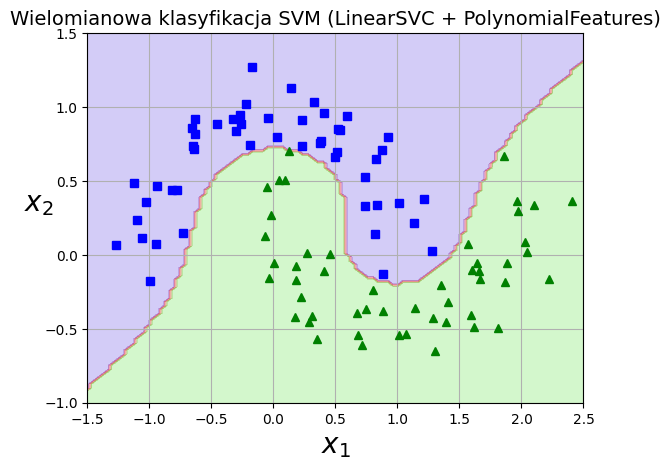

In [10]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.title(
    "Wielomianowa klasyfikacja SVM (LinearSVC + PolynomialFeatures)", fontsize=14)
plt.show()

In [11]:
from sklearn.svm import SVC
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel='rbf', gamma=5, C=0.001)
                                   )
rbf_kernel_svm_clf.fit(X, y)


,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,0.001
,kernel,'rbf'
,degree,3
,gamma,5


In [12]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [15]:
from sklearn.linear_model import SGDClassifier
C = 5 
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss='hinge', C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel='linear', C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

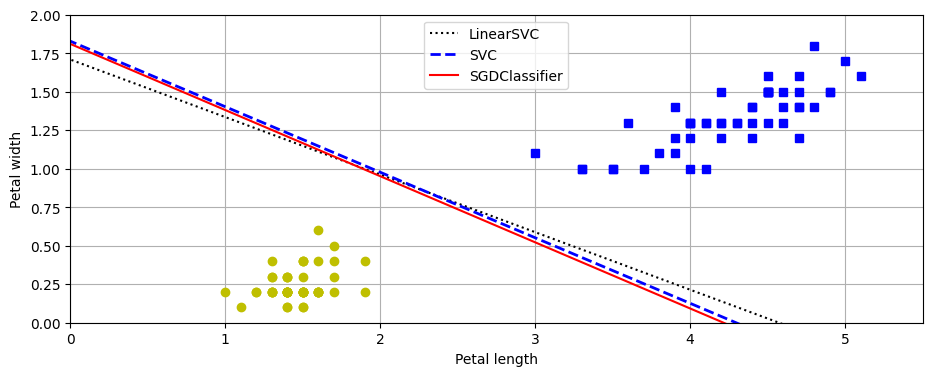

In [16]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])


lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")  # label="Iris versicolor"
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")  # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

In [17]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)



In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)

In [19]:
lin_clf = make_pipeline(StandardScaler(), LinearSVC(dual=True, random_state=42))
lin_clf.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,True
,tol,0.0001


In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

np.float64(0.9774928774928775)

In [21]:
svc_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
cross_val_score(svc_clf, X_train, y_train).mean()

np.float64(0.9698005698005698)

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
  'svc__gamma': loguniform(0.001, 0.01),
  'svc__C': uniform(1, 10) 
}

rnd_search_cv = RandomizedSearchCV(svc_clf, param_distrib, n_iter=100, cv=5,random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,np.float64(10.656320330745594)
,kernel,'rbf'
,degree,3
,gamma,np.float64(0....2759992849893)


In [24]:
rnd_search_cv.best_score_

np.float64(0.9851851851851852)

In [25]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777